# Intel Image Classification

In this project, we will be working on Intel images i.e. images of buildings, forest, street, etc. We will built a convolutional neural network and train it on this images. This is a multi class classification problem and we will use Keras.

In [3]:
import os

directory = r"C:\Users\hp\Desktop\Al ML\Project 8- Image classification\Data\Intel Image Dataset"
contents = os.listdir(directory)
print(contents)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


After mounting our drive we will locate the folder where our data is stored to use it in our colab notebook. Here we will see all the folders I have in my drive and 'Intel Image Dataset' contains the images that we will work on.

In [7]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

We will start by importing some required libraries.

We will check for folders of class images.

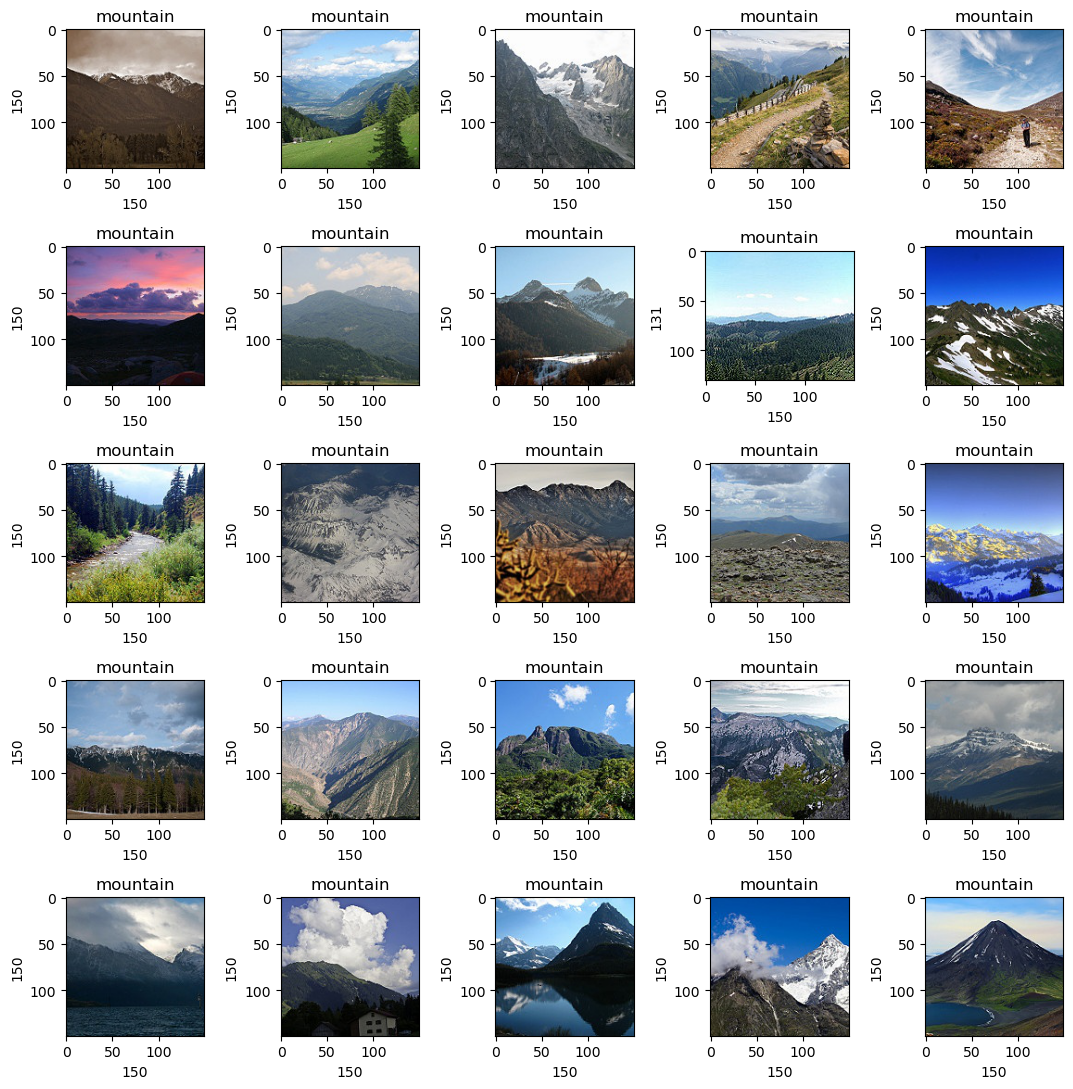

In [9]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = r"C:\Users\hp\Desktop\Al ML\Project 8- Image classification\Data\Intel Image Dataset\mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Let's visualize some of the mountain images that we will be working on. Also we will observe x and y dimensions of the image.

In [10]:
# Setting root directory path and creating empty list
dir = r"C:\Users\hp\Desktop\Al ML\Project 8- Image classification\Data\Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

Setting the root directory for the dataset and storing all the folders name of the dataset. We will also create 2 empty list for image and lables.

In [11]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Next we need to resize images as some of the images don't have same dimensions. So, we will read and resize all the images. Then we will convert it into array and appending the list created above with the image and its label.

In [13]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

Checking for images per class.

In [14]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

Storing the number of classes which will be used further in model architecture.

In [15]:
# Checking x data shape
np.array(image_list).shape

(3000, 150, 150, 3)

Check the shape of the x data for input layer of model architecture.

In [16]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(3000,)

Checking the number of labels in y data which should be equal to total number of images.

In [17]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now we will split our dataset into testing and training using train_test_split() from sklearn.

In [18]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

Next we will normalize the images by dividing them with 255 and we will also reshape x_train and x_test data. 

In [19]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Here we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [20]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Now we will split the training data to validation and training data.

In [21]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

C:\Users\hp\anaconda3\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 146, 146, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 146, 146, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 306,422 (1.17 MB)

 Trainable params: 305,718 (1.17 MB)

 Non-trainable params: 704 (2.75 KB)

Now we will create a network architecture for the model. We have used different types of layers according to their features namely BatchNormalization (Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch), LeakyRelu (The Leaky ReLU modifies the function to allow small negative values when the input is less than zero), Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [22]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

For compiling the model we need to pass 3 parameters namely loss, optimizer and metrics. Here we will use loss as categorical_crossentropy, optimizer as Adam and metrics as accuracy.

In [23]:
# Training the model
epochs = 70
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 164s 7s/step - accuracy: 0.3354 - loss: 1.7368 - val_accuracy: 0.2125 - val_loss: 1.8086
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.5216 - loss: 1.2832 - val_accuracy: 0.1667 - val_loss: 1.8435
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.5882 - loss: 1.1335 - val_accuracy: 0.1708 - val_loss: 1.8840
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.6327 - loss: 1.0301 - val_accuracy: 0.2458 - val_loss: 1.9422
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.7076 - loss: 0.9203 - val_accuracy: 0.2750 - val_loss: 1.9924
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.7376 - loss: 0.8315 - val_accuracy: 0.2271 - val_loss: 2.0675
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.7963 - loss: 0.7511 - val_accuracy: 0.2896 - val_loss: 2.1211
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.7924 - loss: 0.7047 - val_accuracy: 0.2417 - val_loss

Epoch 52/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 107s 7s/step - accuracy: 0.9995 - loss: 0.0419 - val_accuracy: 0.7479 - val_loss: 0.8186
Epoch 53/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 101s 7s/step - accuracy: 0.9999 - loss: 0.0421 - val_accuracy: 0.7667 - val_loss: 0.7342
Epoch 54/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 93s 6s/step - accuracy: 0.9998 - loss: 0.0383 - val_accuracy: 0.7417 - val_loss: 0.9717
Epoch 55/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 98s 7s/step - accuracy: 0.9984 - loss: 0.0457 - val_accuracy: 0.7729 - val_loss: 0.7418
Epoch 56/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 1.0000 - loss: 0.0357 - val_accuracy: 0.7208 - val_loss: 0.9370
Epoch 57/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 1.0000 - loss: 0.0371 - val_accuracy: 0.7521 - val_loss: 0.7975
Epoch 58/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 114s 8s/step - accuracy: 1.0000 - loss: 0.0359 - val_accuracy: 0.7458 - val_loss: 0.8180
Epoch 59/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 116s 8s/step - accuracy: 1.0000 - loss: 0.0373 - val_accuracy: 0.73

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 70 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [25]:
# Saving model
model.save("intel_image.keras")

We will save the model using model.save() to use it later for prediction.

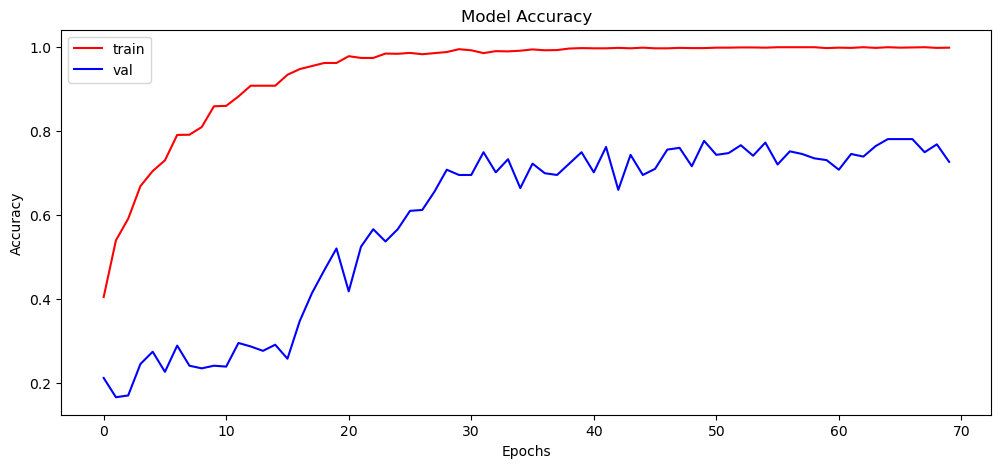

In [26]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.



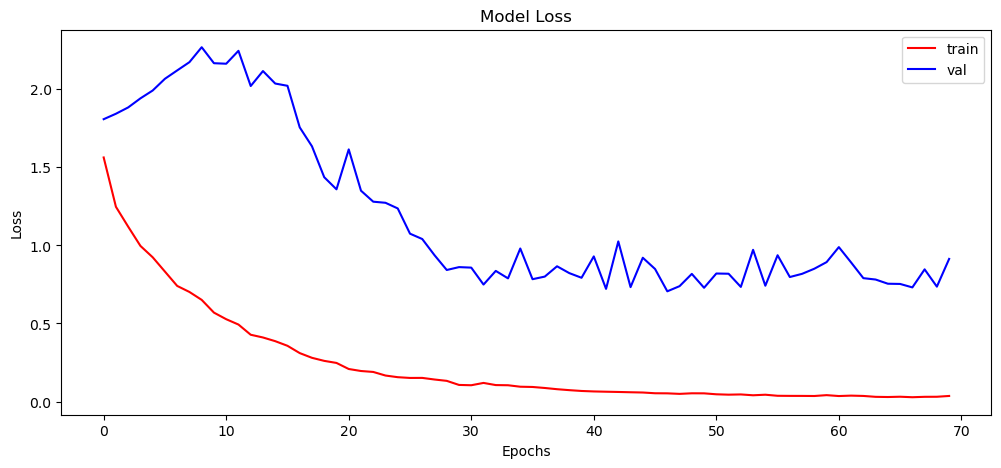

In [27]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the loss of the model for the training history.



In [28]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.7141 - loss: 1.0096
Test Accuracy: 72.66666889190674


Evaluating the model to know the accuracy of the model on the test data.

In [29]:
# Storing model predictions
y_pred = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step


Generating predictions for test data and storing them into y_pred.

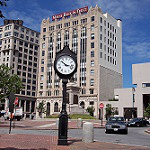

In [32]:
# Plotting image to compare
img = array_to_img(x_test[1])
img

Visualizing an image to be predicted in further steps.

In [33]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  buildings
Predicted :  buildings


Now, we will create list of labels using object of label binarizer. We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax().

## Conclusion:

In this project we saw how we can create a CNN using different layers. Normalizing is an important step when working with any type of dataset. We will use this model to predict the class of the image supplied to the model.

## Scope:

This project has a vast scope, it can be used to classify satellite images, drone images, google images into different classes like sea, mountain, etc. 